## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING DATASET

In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [4]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

In [6]:
df= pd.read_csv(file_name, header=0)

### DATA INFO

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 22.4+ KB


In [9]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


#### ROUNDING UP TO 2 DECIMAL PLACES

In [11]:
df[["Screen_Size_cm"]]= np.round(df[["Screen_Size_cm"]],2)
df[["Screen_Size_cm"]]

,Screen_Size_cm
0,35.56
1,39.62
2,39.62
3,33.78
4,39.62
...,...
233,35.56
234,33.78
235,30.48
236,39.62


### REPLACING MISSING DATA AND VIEWING MISSING DATA

In [15]:
df.replace("?",np.nan, inplace= True)
missing_data= df.isnull()
missing_data.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
#### IDENTIFYING COLUMN WITH MISSING DATA

In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: Unnamed: 0, dtype: int64

Manufacturer
False    238
Name: Manufacturer, dtype: int64

Category
False    238
Name: Category, dtype: int64

Screen
False    238
Name: Screen, dtype: int64

GPU
False    238
Name: GPU, dtype: int64

OS
False    238
Name: OS, dtype: int64

CPU_core
False    238
Name: CPU_core, dtype: int64

Screen_Size_cm
False    234
True       4
Name: Screen_Size_cm, dtype: int64

CPU_frequency
False    238
Name: CPU_frequency, dtype: int64

RAM_GB
False    238
Name: RAM_GB, dtype: int64

Storage_GB_SSD
False    238
Name: Storage_GB_SSD, dtype: int64

Weight_kg
False    233
True       5
Name: Weight_kg, dtype: int64

Price
False    238
Name: Price, dtype: int64



#### REPLACING MISSING DATA WITH THE AVERAGE VALUE FOR WEIGHT

In [23]:
avgvalue = df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"].replace(np.nan, avgvalue, inplace= True)

#### REPLACING MISSING DATA WITH THE MOST FREQUENT VALUE FOR WEIGHT

In [25]:
freqvalue = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, freqvalue, inplace=True)

#### VIEWING THE DATA TYPES

In [27]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```

In [28]:
df["Screen_Size_cm"]= df["Screen_Size_cm"]*2.54
df["Weight_kg"]= 2.205/df["Weight_kg"]

In [30]:
df["Weight_pounds"]= df["Weight_kg"]
df["Screen_Size_inches"]= df["Screen_Size_cm"]

In [31]:
df.dtypes

Unnamed: 0              int64
Manufacturer           object
Category                int64
Screen                 object
GPU                     int64
OS                      int64
CPU_core                int64
Screen_Size_cm        float64
CPU_frequency         float64
RAM_GB                  int64
Storage_GB_SSD          int64
Weight_kg             float64
Price                   int64
Weight_pounds         float64
Screen_Size_inches    float64
dtype: object

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [32]:
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()

In [33]:
df.dtypes

Unnamed: 0              int64
Manufacturer           object
Category                int64
Screen                 object
GPU                     int64
OS                      int64
CPU_core                int64
Screen_Size_cm        float64
CPU_frequency         float64
RAM_GB                  int64
Storage_GB_SSD          int64
Weight_kg             float64
Price                   int64
Weight_pounds         float64
Screen_Size_inches    float64
dtype: object

In [34]:
df["CPU_frequency"]

0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [45]:
# categorize
bins = np.linspace(min(df["Price"]), max(df["Price"]),4)
# give group name for the category
group_names= ["Low", "Medium", "High"]
#create a column for the category
df["price-binned"]= pd.cut(df["Price"], bins, labels= group_names, include_lowest= True)

In [51]:
print(df["Price"])
print(df["price-binned"])

0       978
1       634
2       946
3      1244
4       837
       ... 
233    1891
234    1950
235    2236
236     883
237    1499
Name: Price, Length: 238, dtype: int64
0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
233    Medium
234    Medium
235    Medium
236       Low
237       Low
Name: price-binned, Length: 238, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


### plot the bar graph of these bins

Text(0.5, 1.0, 'price bins')

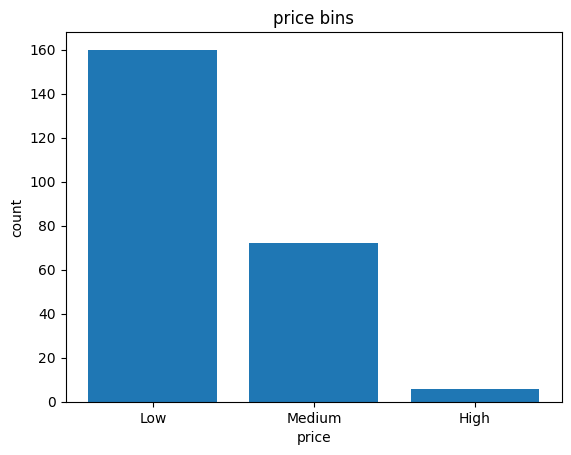

In [52]:
plt.bar(group_names,df["price-binned"].value_counts())
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")

In [58]:
df["Manufacturer"]

0         Acer
1         Dell
2         Dell
3         Dell
4           HP
        ...   
233     Lenovo
234    Toshiba
235     Lenovo
236     Lenovo
237    Toshiba
Name: Manufacturer, Length: 238, dtype: object

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [66]:
dummy_variable_1 =pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel': 'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df=pd.concat([df,dummy_variable_1],axis=1)

df.drop("Screen", axis =1, inplace= True)

In [67]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_pounds,Screen_Size_inches,price-binned,Screen-Full_HD,Screen-IPS_panel,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,90.3224,0.551724,8,256,1.378125,978,1.378125,90.3224,Low,0,1,0,1
1,1,Dell,3,1,1,3,100.6348,0.689655,4,256,1.002273,634,1.002273,100.6348,Low,1,0,1,0
2,2,Dell,3,1,1,7,100.6348,0.931034,8,256,1.002273,946,1.002273,100.6348,Low,1,0,1,0
3,3,Dell,4,2,1,5,85.8012,0.551724,8,128,1.807377,1244,1.807377,85.8012,Low,0,1,0,1
4,4,HP,4,2,1,7,100.6348,0.620690,8,256,1.154450,837,1.154450,100.6348,Low,1,0,1,0


### DROPPING COLUMNS

In [68]:
df.drop("Screen_Size_cm", axis=1, inplace =True)
df.drop("Weight_kg", axis=1, inplace =True)

In [69]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Weight_pounds,Screen_Size_inches,price-binned,Screen-Full_HD,Screen-IPS_panel,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,0.551724,8,256,978,1.378125,90.3224,Low,0,1,0,1
1,1,Dell,3,1,1,3,0.689655,4,256,634,1.002273,100.6348,Low,1,0,1,0
2,2,Dell,3,1,1,7,0.931034,8,256,946,1.002273,100.6348,Low,1,0,1,0
3,3,Dell,4,2,1,5,0.551724,8,128,1244,1.807377,85.8012,Low,0,1,0,1
4,4,HP,4,2,1,7,0.620690,8,256,837,1.154450,100.6348,Low,1,0,1,0
